## Data Discovering

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.pipeline import Pipeline
import xgboost as xgb

plt.style.use("ggplot")

In [57]:
df = pd.read_csv("data/heart.csv")

In [58]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [60]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [61]:
# Separate continuous and categorical columns
continuous_cols = df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]  # Selecting continuous columns
cat_cols = df.drop(columns=continuous_cols.columns)  # Dropping continuous columns to obtain categorical columns

In [62]:
continuous_cols.describe()

,age,trestbps,chol,thalach,oldpeak
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512
std,9.072290,17.516718,51.59251,23.005724,1.175053
min,29.000000,94.000000,126.00000,71.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000
75%,61.000000,140.000000,275.00000,166.000000,1.800000
max,77.000000,200.000000,564.00000,202.000000,6.200000


In [63]:
def categorical_describe(series):
    """
    Function to describe categorical data in a Series.
    This function returns the count of unique values, the most common values, and their frequencies.
    """
    unique_values = series.unique()
    most_common_values = series.value_counts().head()
    return pd.Series({
        'unique_values_count': len(unique_values),
        'most_common_values': most_common_values.index.tolist(),
        'most_common_values_count': most_common_values.tolist()
    })

In [64]:
cat_data_description = cat_cols.apply(categorical_describe)
cat_data_description

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
unique_values_count,2,4,2,3,2,3,5,4,2
most_common_values,"[1, 0]","[0, 2, 1, 3]","[0, 1]","[1, 0, 2]","[0, 1]","[1, 2, 0]","[0, 1, 2, 3, 4]","[2, 3, 1, 0]","[1, 0]"
most_common_values_count,"[713, 312]","[497, 284, 167, 77]","[872, 153]","[513, 497, 15]","[680, 345]","[482, 469, 74]","[578, 226, 134, 69, 18]","[544, 410, 64, 7]","[526, 499]"


## Data Cleaning

In [65]:
# Check for missing values in each column of the DataFrame 
# This function returns the sum of missing values for each column
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [66]:
# Calculate the maximum number of missing values across all columns in the DataFrame 'df'
# Ensure there's no missing values left 
df.isna().sum().max()

0

In [67]:
# Identify duplicate rows in the DataFrame
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
43,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
61,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [68]:
# Remove duplicate rows from the DataFrame
df = df.drop_duplicates()

## Feature Analysis

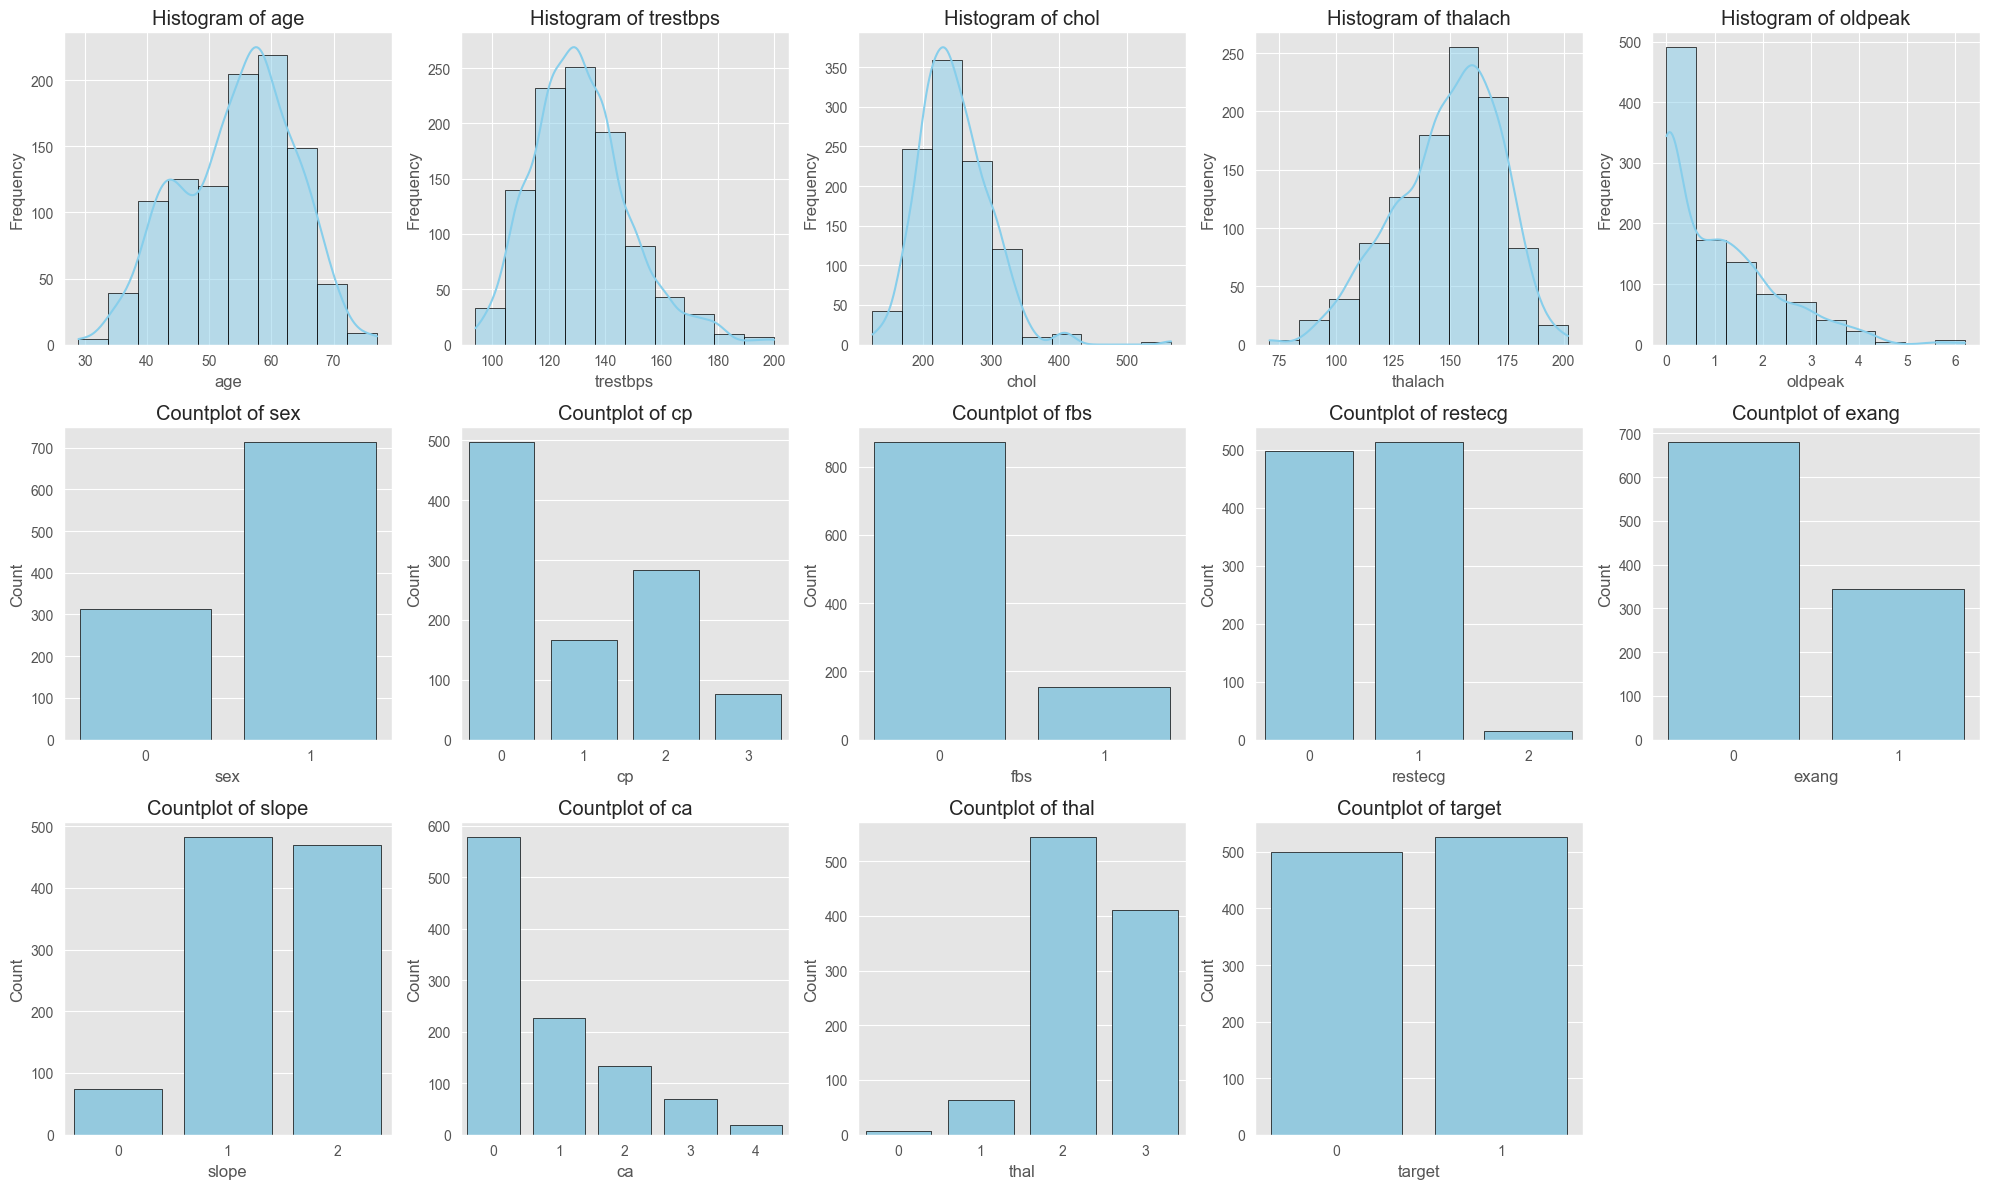

In [69]:
# Create subplots grid
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 12))

# Get column names from continuous_cols DataFrame
continuous_column_names = continuous_cols.columns
cat_column_names = cat_cols.columns

# Iterate over each continuous column
for i, column in enumerate(continuous_column_names):
    # Calculate row and column indices
    row = i // 5
    col = i % 5

    # Create histogram for the current continuous column
    sns.histplot(data=continuous_cols[column], bins=10, color='skyblue', kde=True, edgecolor='black', ax=axes[row, col])

    # Set labels and title for the current subplot
    axes[row, col].set_xlabel(f'{column}')
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].set_title(f'Histogram of {column}')

# Iterate over each categorical column
for i, column in enumerate(cat_column_names, start=len(continuous_column_names)):
    # Calculate row and column indices
    row = i // 5
    col = i % 5

    # Create countplot for the current categorical column
    sns.countplot(data=cat_cols, x=column, ax=axes[row, col], color='skyblue', edgecolor='black')

    # Set labels and title for the current subplot
    axes[row, col].set_xlabel(f'{column}')
    axes[row, col].set_ylabel('Count')
    axes[row, col].set_title(f'Countplot of {column}')

# Hide unnecessary subplots
for i in range(len(continuous_column_names) + len(cat_column_names), len(axes.flat)):
    axes.flatten()[i].axis('off')

# Adjust layout, save fig and display the plot
plt.tight_layout()
plt.savefig("media/univariate_feature_analysis_grid.png")
plt.show()

In [70]:
# Calculate the correlation matrix of the DataFrame
df_corr = df.corr()
df_corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


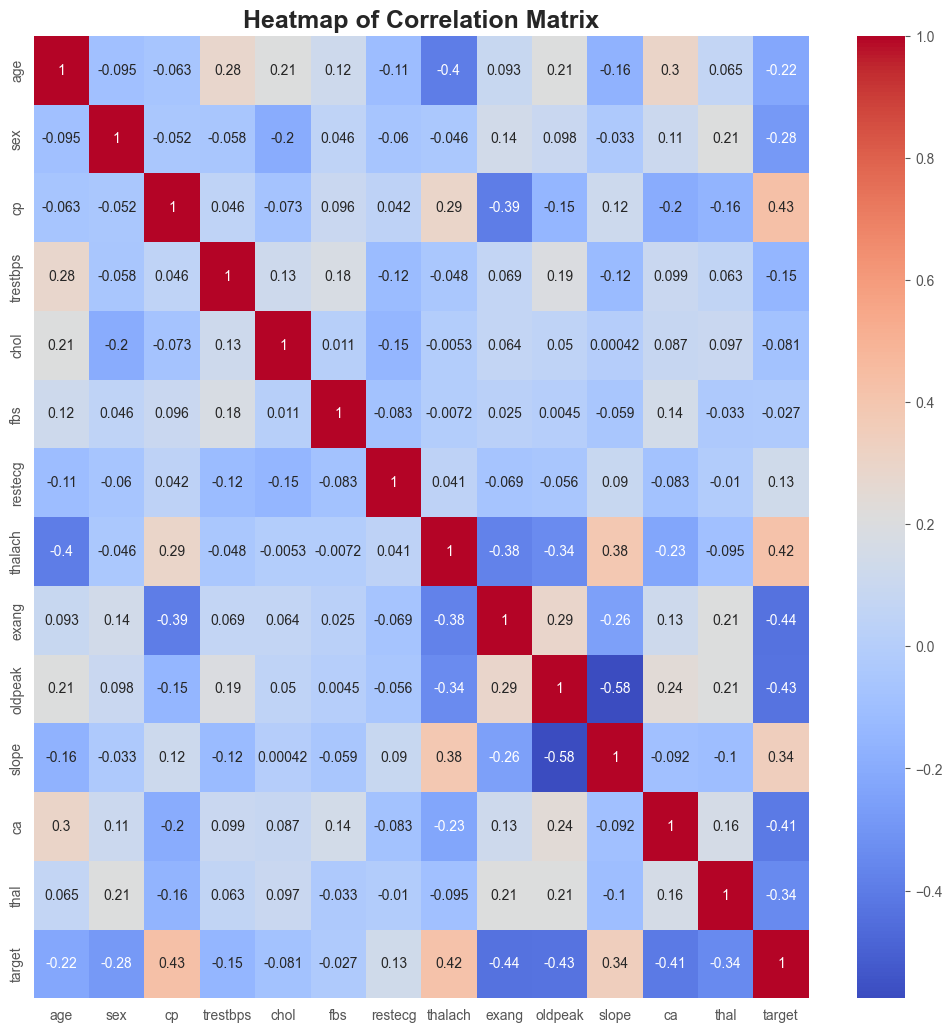

In [71]:
# Create a heatmap of the correlation matrix with seaborn
# Set the figure size
plt.figure(figsize=(12.5, 12.5))

# Plot the heatmap with annotations and using the 'coolwarm' colormap
sns.heatmap(df_corr, annot=True, cmap='coolwarm')

# Set the title of the plot with custom font size and weight
plt.title("Heatmap of Correlation Matrix", fontsize=18, fontweight='bold')

# Save the plot as an image file
plt.savefig("media/correlation_matrix_heatmap.png")

# Show the plot
plt.show()

# Feature Selection

In [72]:
# Dropping features with low correlation to target variable
df = df.drop(columns=['trestbps', 'chol', 'fbs', 'restecg'])

In [73]:
df.head()

,age,sex,cp,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,168,0,1.0,2,2,3,0
1,53,1,0,155,1,3.1,0,0,3,0
2,70,1,0,125,1,2.6,0,0,3,0
3,61,1,0,161,0,0.0,2,1,3,0
4,62,0,0,106,0,1.9,1,3,2,0


# Data Modeling

## Train/Test - Split

In [74]:
# Separating features (X) and target variable (y)
X = df.drop('target', axis=1)  # Independent Features
y = df['target']  # Dependent Target variable

In [75]:
# Splitting the dataset into training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Pipelining Scaler and Estimator

In [76]:
# Defining pipelines for various classifiers
pipelines = {
    'Logistic Regression': Pipeline([('scaler', StandardScaler()), ('clf', LogisticRegression())]),
    'KNN': Pipeline([('scaler', StandardScaler()), ('clf', KNeighborsClassifier())]),
    'Naive Bayes': Pipeline([('scaler', StandardScaler()), ('clf', GaussianNB())]),
    'SVM': Pipeline([('scaler', StandardScaler()), ('clf', SVC())]),
    'Random Forest': Pipeline([('scaler', StandardScaler()), ('clf', RandomForestClassifier())]),
    'Decision Tree': Pipeline([('scaler', StandardScaler()), ('clf', DecisionTreeClassifier())]),
    'Gradient Boosting': Pipeline([('clf', GradientBoostingClassifier())]),
    'XGBoost': Pipeline([('scaler', StandardScaler()), ('clf', xgb.XGBClassifier(objective="binary:logistic"))])
}

## Hyperparameter Tuning using Grid Search

In [77]:
# Define parameter grids for hyperparameter tuning
param_grids = {
    'Logistic Regression': {
        'clf__C': [0.1, 1, 10],
        'clf__penalty': ['l1', 'l2'],
        'clf__solver': ['liblinear', 'saga']
    },
    'KNN': {
        'clf__n_neighbors': [3, 5, 7],
        'clf__weights': ['uniform', 'distance'],
        'clf__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    },
    'Naive Bayes': {

    },
    'SVM': {
        'clf__C': [0.1, 1, 10],
        'clf__gamma': [0.1, 1, 'auto'],
        'clf__kernel': ['linear', 'poly', 'rbf', 'sigmoid']
    },
    'Random Forest': {
        'clf__n_estimators': [50, 100, 200],
        'clf__max_features': ['sqrt', 'log2'],
        'clf__bootstrap': [True, False]
    },
    'Decision Tree': {
        'clf__max_depth': [None, 5, 10, 20],
        'clf__min_samples_split': [2, 5, 10],
        'clf__min_samples_leaf': [1, 2, 4]
    },
    'Gradient Boosting': {
    'clf__n_estimators': [50, 100, 200], 
    'clf__learning_rate': [0.01, 0.1, 0.5],
    'clf__max_depth': [3, 5, 7], 
    'clf__min_samples_split': [2, 5, 10]
    },
    'XGBoost': {
        'clf__n_estimators': [50, 100, 200],
        'clf__learning_rate': [0.01, 0.1, 0.5],
        'clf__max_depth': [3, 5, 7],
        'clf__min_child_weight': [1, 3, 5]
    }
}

In [78]:
# Perform hyperparameter tuning using GridSearchCV
grid_searches = {}

# Iterate over each model and its corresponding pipeline
for model_name, pipeline in pipelines.items():
    # Create a GridSearchCV object for hyperparameter tuning
    grid_search = GridSearchCV(pipeline, param_grid=param_grids[model_name], cv=5, scoring='accuracy')
    
    # Store the GridSearchCV object in the dictionary
    grid_searches[model_name] = grid_search

In [79]:
# Train each model using the best hyperparameters obtained from GridSearchCV
best_estimators = {}

# Iterate over each model and its corresponding GridSearchCV object
for model_name, grid_search in grid_searches.items():
    print(f"Training {model_name}...")
    
    # Fit the GridSearchCV object to find the best estimator
    grid_search.fit(X_train, y_train)
    
    # Store the best estimator in the dictionary
    best_estimators[model_name] = grid_search.best_estimator_

Training Logistic Regression...
Training KNN...
Training Naive Bayes...
Training SVM...
Training Random Forest...
Training Decision Tree...
Training Gradient Boosting...
Training XGBoost...


In [80]:
best_estimators

{'Logistic Regression': Pipeline(steps=[('scaler', StandardScaler()),
                 ('clf',
                  LogisticRegression(C=10, penalty='l1', solver='liblinear'))]),
 'KNN': Pipeline(steps=[('scaler', StandardScaler()), ('clf', KNeighborsClassifier())]),
 'Naive Bayes': Pipeline(steps=[('scaler', StandardScaler()), ('clf', GaussianNB())]),
 'SVM': Pipeline(steps=[('scaler', StandardScaler()), ('clf', SVC(C=10, gamma=0.1))]),
 'Random Forest': Pipeline(steps=[('scaler', StandardScaler()),
                 ('clf', RandomForestClassifier(n_estimators=50))]),
 'Decision Tree': Pipeline(steps=[('scaler', StandardScaler()),
                 ('clf',
                  DecisionTreeClassifier(max_depth=5, min_samples_split=5))]),
 'Gradient Boosting': Pipeline(steps=[('clf',
                  GradientBoostingClassifier(learning_rate=0.01, max_depth=5,
                                             min_samples_split=10,
                                             n_estimators=50))]),
 'X

## Model Evaluation

In [81]:
results = {'model_name': [], 'conf_matrix': [], 'accuracy': [],
           'precision': [], 'recall': [], 'specificity': [], 'f1_score': []}

# Loop through each model and its corresponding best estimator
for model_name, estimator in best_estimators.items():
    print(f"Predictions using best estimator of {model_name}:")
    y_pred = estimator.predict(X_test)
    print("*" * 100)
    print("Confusion Matrix:")
    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(conf_matrix)

    # Calculate accuracy score
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy Score: {acc}")

    print("................Classification Report................")
    # Generate the classification report and print it
    report = classification_report(y_test, y_pred, zero_division=1, output_dict=True)
    print(classification_report(y_test, y_pred, zero_division=1))

    # Extract precision, recall, f1-score, and specificity from the report and confusion matrix
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1 = report['weighted avg']['f1-score']
    specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

    # Append the results to the 'results' dictionary
    results['model_name'].append(model_name)
    results['conf_matrix'].append(conf_matrix)
    results['accuracy'].append(acc)
    results['precision'].append(precision)
    results['recall'].append(recall)
    results['specificity'].append(specificity)
    results['f1_score'].append(f1)

Predictions using best estimator of Logistic Regression:
****************************************************************************************************
Confusion Matrix:
[[25  7]
 [ 2 27]]
Accuracy Score: 0.8524590163934426
................Classification Report................
              precision    recall  f1-score   support

           0       0.93      0.78      0.85        32
           1       0.79      0.93      0.86        29

    accuracy                           0.85        61
   macro avg       0.86      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61

Predictions using best estimator of KNN:
****************************************************************************************************
Confusion Matrix:
[[25  7]
 [ 3 26]]
Accuracy Score: 0.8360655737704918
................Classification Report................
              precision    recall  f1-score   support

           0       0.89      0.78      0.83        32
           1

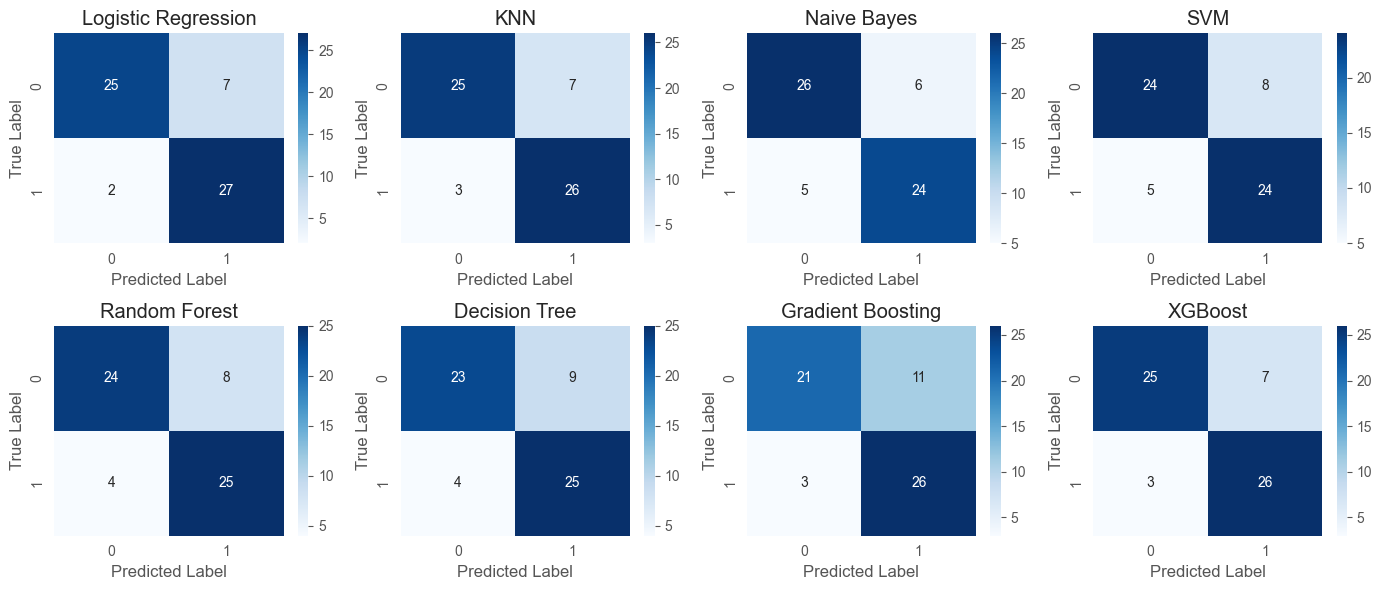

In [82]:
# Get the number of models
num_models = len(results['model_name'])

# Create subplots with 2 rows and 4 columns
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(14, 6))

# Iterate through each model
for i in range(num_models):
    # Calculate the row and column index for the subplot
    row = i // 4  # Integer division to determine the row index
    col = i % 4  # Modulo operation to determine the column index

    # Plot the confusion matrix heatmap for the current model
    sns.heatmap(results['conf_matrix'][i], annot=True, cmap='Blues', fmt='g', ax=axes[row, col])

    # Set the title for the subplot with the model name
    axes[row, col].set_title(f'{results["model_name"][i]}')

    # Set labels for the x-axis and y-axis
    axes[row, col].set_xlabel('Predicted Label')
    axes[row, col].set_ylabel('True Label')

# Adjust layout to prevent overlapping
plt.tight_layout()

plt.savefig("media/confusion_matrix_heatmap.png")

# Display the plot
plt.show()

In [83]:
def plot_metrics(local_model_names, local_metrics, local_metric_names, local_colors):
    # Determine the number of metrics
    num_metrics = len(local_metric_names)

    # Set the width of each bar
    bar_width = 0.15

    # Create an array of evenly spaced indices for the x-axis
    index = np.arange(len(local_model_names))

    # Create a new figure with specified size
    plt.figure(figsize=(14, 6))

    # Iterate over each metric
    for i in range(num_metrics):
        # Plot bars for the current metric, adjusting their position based on the index and bar width
        bars = plt.bar(index + i * bar_width, local_metrics[i], bar_width, label=local_metric_names[i], color=local_colors[i],
                edgecolor='black')

        # Add data labels to each bar
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom', rotation=90, fontsize=8.5)


    # Set the labels and title of the plot
    plt.xlabel('Model')
    plt.ylabel('Metric Score')
    plt.title('Model Performance Metrics', fontsize=18, fontweight='bold', y=1.025)

    # Set the x-axis ticks and labels
    plt.xticks(index + (num_metrics - 1) * bar_width / 2, local_model_names, rotation=45, ha='right')

    # Add a legend to the plot
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

    # Add gridlines to the y-axis
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Adjust the layout to prevent overlapping of plot elements
    plt.tight_layout()

    plt.savefig("media/model_metrics_grouped_barchart.png")

    # Show the plot
    plt.show()

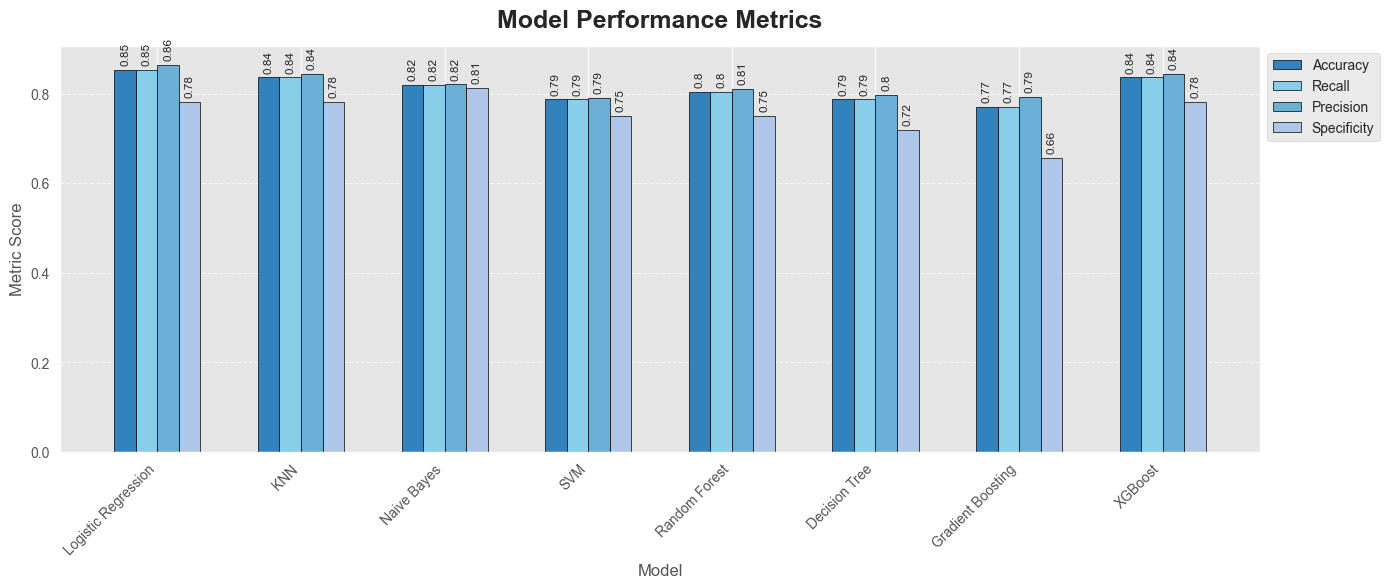

In [84]:
# Extract model names and corresponding metrics from the results dictionary
model_names = results['model_name']
accuracies = results['accuracy']
recalls = results['recall']
precisions = results['precision']
specificities = results['specificity']

# Define metric names and colors for plotting
metric_names = ['Accuracy', 'Recall', 'Precision', 'Specificity']
colors = ['#3182bd', 'skyblue', '#6baed6', '#aec7e8']

# Combine metrics into a list for plotting
metrics = [accuracies, recalls, precisions, specificities]

# Plot the model performance metrics
plot_metrics(model_names, metrics, metric_names, colors)